# Import libraries

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Import Data

In [2]:
import os 
data_path = os.path.join("..", "data", "Supplementary Information File 1 (SIF-1).xlsx")
print (data_path)
# os.listdir(data_path)

..\data\Supplementary Information File 1 (SIF-1).xlsx


In [3]:

df = pd.read_excel(data_path)
df.head()

,S.No,Compound,A,B,In literature,Lowest distortion,v(A),v(B),r(AXII)(Å),r(AVI)(Å),r(BVI)(Å),EN(A),EN(B),l(A-O)(Å),l(B-O)(Å),ΔENR,tG,τ,μ
0,1,Ac2O3,Ac,Ac,False,cubic,element not in BV,element not in BV,1.12,1.12,1.12,1.1,1.10,0.0,0.000000,-3.248000,0.707107,-,0.800000
1,2,AcAgO3,Ac,Ag,False,orthorhombic,element not in BV,element not in BV,1.12,1.12,0.95,1.1,1.93,0.0,2.488353,-2.565071,0.758259,-,0.678571
2,3,AcAlO3,Ac,Al,False,cubic,element not in BV,element not in BV,1.12,1.12,0.54,1.1,1.61,0.0,1.892894,-1.846714,0.918510,-,0.385714
3,4,AcAsO3,Ac,As,False,orthorhombic,element not in BV,element not in BV,1.12,1.12,0.52,1.1,2.18,0.0,1.932227,-1.577429,0.928078,-,0.371429
4,5,AcAuO3,Ac,Au,False,orthorhombic,element not in BV,element not in BV,1.12,1.12,0.93,1.1,2.54,0.0,2.313698,-2.279786,0.764768,-,0.664286


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5329 entries, 0 to 5328
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No               5329 non-null   int64  
 1   Compound           5329 non-null   object 
 2   A                  5329 non-null   object 
 3   B                  5329 non-null   object 
 4   In literature      5329 non-null   bool   
 5   Lowest distortion  5329 non-null   object 
 6   v(A)               5329 non-null   object 
 7   v(B)               5329 non-null   object 
 8   r(AXII)(Å)         5329 non-null   float64
 9   r(AVI)(Å)          5329 non-null   float64
 10  r(BVI)(Å)          5329 non-null   float64
 11  EN(A)              5329 non-null   float64
 12  EN(B)              5329 non-null   float64
 13  l(A-O)(Å)          5329 non-null   float64
 14  l(B-O)(Å)          5329 non-null   float64
 15  ΔENR               5329 non-null   float64
 16  tG                 5329 

In [5]:
data=df.copy()

# Dropping features

In [6]:
# Drop the rows of "Lowest distortion" == "-"
data=data[data['Lowest distortion'] != "-"] 

In [7]:
# drop the compound, A, B, In literature, s.no
data.drop(['S.No', 'Compound', 'v(A)', 'v(B)',
            'A', 'B', 'In literature' , 'τ' ],
              axis=1, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5276 entries, 0 to 5328
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Lowest distortion  5276 non-null   object 
 1   r(AXII)(Å)         5276 non-null   float64
 2   r(AVI)(Å)          5276 non-null   float64
 3   r(BVI)(Å)          5276 non-null   float64
 4   EN(A)              5276 non-null   float64
 5   EN(B)              5276 non-null   float64
 6   l(A-O)(Å)          5276 non-null   float64
 7   l(B-O)(Å)          5276 non-null   float64
 8   ΔENR               5276 non-null   float64
 9   tG                 5276 non-null   float64
 10  μ                  5276 non-null   float64
dtypes: float64(10), object(1)
memory usage: 494.6+ KB


In [8]:
data.head()

,Lowest distortion,r(AXII)(Å),r(AVI)(Å),r(BVI)(Å),EN(A),EN(B),l(A-O)(Å),l(B-O)(Å),ΔENR,tG,μ
0,cubic,1.12,1.12,1.12,1.1,1.10,0.0,0.000000,-3.248000,0.707107,0.800000
1,orthorhombic,1.12,1.12,0.95,1.1,1.93,0.0,2.488353,-2.565071,0.758259,0.678571
2,cubic,1.12,1.12,0.54,1.1,1.61,0.0,1.892894,-1.846714,0.918510,0.385714
3,orthorhombic,1.12,1.12,0.52,1.1,2.18,0.0,1.932227,-1.577429,0.928078,0.371429
4,orthorhombic,1.12,1.12,0.93,1.1,2.54,0.0,2.313698,-2.279786,0.764768,0.664286


In [9]:
# send the lowest distortion column at the end
distortion= data['Lowest distortion']

# move the column to the end
data = data.drop(['Lowest distortion'], axis=1)#.join(distortion)


In [10]:
data.head()

,r(AXII)(Å),r(AVI)(Å),r(BVI)(Å),EN(A),EN(B),l(A-O)(Å),l(B-O)(Å),ΔENR,tG,μ
0,1.12,1.12,1.12,1.1,1.10,0.0,0.000000,-3.248000,0.707107,0.800000
1,1.12,1.12,0.95,1.1,1.93,0.0,2.488353,-2.565071,0.758259,0.678571
2,1.12,1.12,0.54,1.1,1.61,0.0,1.892894,-1.846714,0.918510,0.385714
3,1.12,1.12,0.52,1.1,2.18,0.0,1.932227,-1.577429,0.928078,0.371429
4,1.12,1.12,0.93,1.1,2.54,0.0,2.313698,-2.279786,0.764768,0.664286


In [11]:
data.describe()

,r(AXII)(Å),r(AVI)(Å),r(BVI)(Å),EN(A),EN(B),l(A-O)(Å),l(B-O)(Å),ΔENR,tG,μ
count,5276.000000,5276.000000,5276.000000,5276.000000,5276.000000,5276.000000,5276.000000,5276.000000,5276.000000,5276.000000
mean,0.975038,0.825679,0.815317,1.573211,1.575324,2.290079,2.011475,-2.194221,0.766848,0.582370
std,0.337024,0.244605,0.243546,0.449922,0.448241,0.663045,0.594176,0.661116,0.135688,0.173961
min,0.270000,0.270000,0.270000,0.790000,0.790000,0.000000,0.000000,-5.411536,0.384648,0.192857
25%,0.690000,0.630000,0.630000,1.200000,1.200000,2.290644,1.956808,-2.599286,0.669561,0.450000
50%,0.930000,0.800000,0.770000,1.550000,1.550000,2.393444,2.096141,-2.098589,0.757121,0.550000
75%,1.180000,0.950000,0.950000,1.930000,1.930000,2.571812,2.286435,-1.710080,0.851209,0.678571
max,1.880000,1.670000,1.670000,2.540000,2.540000,3.300176,3.009747,-0.601714,1.388809,1.192857


In [12]:
data.isnull().sum()

r(AXII)(Å)    0
r(AVI)(Å)     0
r(BVI)(Å)     0
EN(A)         0
EN(B)         0
l(A-O)(Å)     0
l(B-O)(Å)     0
ΔENR          0
tG            0
μ             0
dtype: int64

In [13]:
distortion

0              cubic
1       orthorhombic
2              cubic
3       orthorhombic
4       orthorhombic
            ...     
5324           cubic
5325           cubic
5326    orthorhombic
5327           cubic
5328           cubic
Name: Lowest distortion, Length: 5276, dtype: object

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5276 entries, 0 to 5328
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   r(AXII)(Å)  5276 non-null   float64
 1   r(AVI)(Å)   5276 non-null   float64
 2   r(BVI)(Å)   5276 non-null   float64
 3   EN(A)       5276 non-null   float64
 4   EN(B)       5276 non-null   float64
 5   l(A-O)(Å)   5276 non-null   float64
 6   l(B-O)(Å)   5276 non-null   float64
 7   ΔENR        5276 non-null   float64
 8   tG          5276 non-null   float64
 9   μ           5276 non-null   float64
dtypes: float64(10)
memory usage: 453.4 KB


# Data Visualization

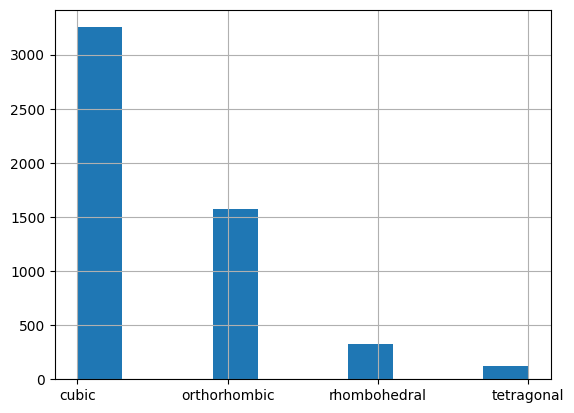

In [15]:
distortion.hist()
plt.style.use('ggplot')


## Correlation Analysis

<Axes: >

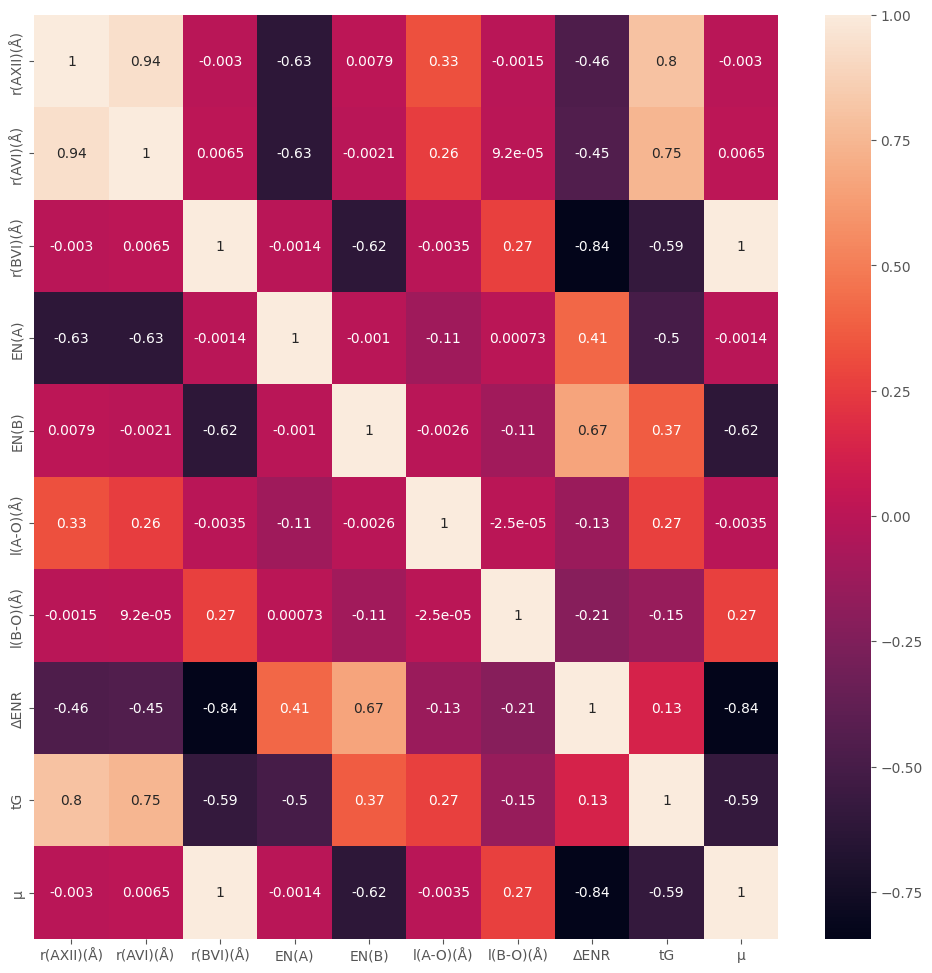

In [47]:
correlations= data.corr()
f,ax = plt.subplots(figsize=(12,12))
sns.heatmap(correlations,annot=True)

# Test Train split

In [17]:
from sklearn.model_selection import train_test_split
X = data
y = distortion

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=108)

# Training model

## Random Forest

In [18]:
# Random forest classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
def RF_Model (X_train, y_train , norm_func = None):
    if norm_func is None:
        norm_func = lambda x : x    # noqa: E731

    model = RandomForestClassifier(n_estimators=1400, max_depth=40, #max_features='auto',
                                criterion='entropy', min_samples_leaf=1, min_samples_split=2,
                                    random_state=108)
    model.fit(X_train, y_train)
    return model

In [19]:
RF_model = RF_Model(X_train, y_train)
y_pred = RF_model.predict(X_test)
print(classification_report(y_test, y_pred))
y_pred

              precision    recall  f1-score   support

       cubic       0.84      0.88      0.86       655
orthorhombic       0.67      0.72      0.70       312
rhombohedral       0.56      0.21      0.30        67
  tetragonal       0.26      0.23      0.24        22

    accuracy                           0.77      1056
   macro avg       0.59      0.51      0.53      1056
weighted avg       0.76      0.77      0.76      1056



array(['cubic', 'cubic', 'cubic', ..., 'cubic', 'cubic', 'cubic'],
      dtype=object)

In [20]:
RF_model.score(X_test, y_test)

0.7736742424242424

## Feature importance


In [21]:
# importance= model.feature_importances_

# for i,v in enumerate(importance):
#     print('Feature: %0d, Score: %.5f' % (i,v))

# plt.bar([x for x in range(len(importance))], importance)
# plt.show()

## Decision Tree

In [22]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

In [23]:
DT_model = DecisionTreeClassifier()

In [24]:
DT_model.fit(X_train,y_train)
DT_model.score(X_test,y_test)

0.696969696969697

Feature: 0, Score: 0.07557
Feature: 1, Score: 0.07968
Feature: 2, Score: 0.08624
Feature: 3, Score: 0.09742
Feature: 4, Score: 0.10316
Feature: 5, Score: 0.05987
Feature: 6, Score: 0.08225
Feature: 7, Score: 0.17967
Feature: 8, Score: 0.19916
Feature: 9, Score: 0.03699


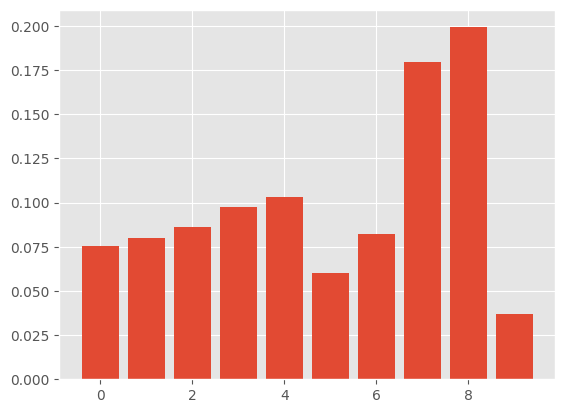

In [25]:
importance = DT_model.feature_importances_
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))

plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [26]:
predictions = DT_model.predict(X_test)

In [27]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

       cubic       0.82      0.80      0.81       655
orthorhombic       0.59      0.63      0.61       312
rhombohedral       0.20      0.16      0.18        67
  tetragonal       0.21      0.32      0.25        22

    accuracy                           0.70      1056
   macro avg       0.46      0.48      0.46      1056
weighted avg       0.70      0.70      0.70      1056



In [28]:
print(confusion_matrix(y_test,predictions))

[[521  97  21  16]
 [ 85 197  22   8]
 [ 15  39  11   2]
 [ 12   3   0   7]]


## K Fold validation

In [29]:

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

kfold = KFold(n_splits = 5)

In [30]:
kfold

KFold(n_splits=5, random_state=None, shuffle=False)

In [31]:
X = data.to_numpy()
y = distortion.to_numpy()

In [32]:
print(f"Data : {X.shape} \nLabel: {y.shape}\n")
for train , val in kfold.split(X, y):
    print(f"Train: {train.shape} \nTest : {val.shape}\nTotal: {train.shape[0] + val.shape[0]}\n")
    print(f"data : {X[train].shape} \nlabel: {y[val].shape}\n")

Data : (5276, 10) 
Label: (5276,)

Train: (4220,) 
Test : (1056,)
Total: 5276

data : (4220, 10) 
label: (1056,)

Train: (4221,) 
Test : (1055,)
Total: 5276

data : (4221, 10) 
label: (1055,)

Train: (4221,) 
Test : (1055,)
Total: 5276

data : (4221, 10) 
label: (1055,)

Train: (4221,) 
Test : (1055,)
Total: 5276

data : (4221, 10) 
label: (1055,)

Train: (4221,) 
Test : (1055,)
Total: 5276

data : (4221, 10) 
label: (1055,)



## XGBoost

In [33]:
import xgboost as xgb


In [34]:
def XGB_Model_func(x , y , norm_func = None , n_estimators = 100):
    if norm_func is None:
        norm_func = lambda x : x    # noqa: E731
    
    # Define the XGBoost model with a linear objective function
    xgb_model = xgb.XGBClassifier(
        # objective='reg:linear',  # Linear objective function
        max_depth=12,
        learning_rate=0.25,
        # n_estimators=n_estimators,
        # n_jobs=-1
        gamma = 0.1,
        objective = 'multi:softprob'

    )
    
    # Train the model on the training data
    xgb_model.fit(norm_func(x), y)
    
    return xgb_model

In [35]:
y_train.to_numpy()

array(['cubic', 'cubic', 'rhombohedral', ..., 'cubic', 'orthorhombic',
       'cubic'], dtype=object)

In [36]:
def to_num(y_train):
    n = y_train.shape[0]
    y_train_np = y_train.to_numpy()
    y_train_num = np.zeros((n,))
    leftout = 0
    for i in range(n):
        if y_train_np[i] == 'cubic':
            y_train_num[i] = 1
        elif y_train_np[i] == 'rhombohedral':
            y_train_num[i] = 4
        elif y_train_np[i] == 'tetragonal':
            y_train_num[i] = 2
        elif y_train_np[i] == 'orthorhombic':
            y_train_num[i] = 3
        else:
            leftout+=1

    # leftout
    
    return (y_train_num-1).astype(int)



In [37]:
y_train_num= to_num(y_train)
# show unique values
np.unique(y_train_num)

array([0, 1, 2, 3])

In [38]:
XGB_model=XGB_Model_func(X_train,y_train_num)
XGB_model

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.1, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.25, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=12, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [39]:
predictions = XGB_model.predict(X_test)
print(classification_report(to_num(y_test),predictions))

              precision    recall  f1-score   support

           0       0.86      0.89      0.87       655
           1       0.36      0.36      0.36        22
           2       0.69      0.74      0.71       312
           3       0.50      0.21      0.29        67

    accuracy                           0.79      1056
   macro avg       0.60      0.55      0.56      1056
weighted avg       0.78      0.79      0.78      1056



In [40]:
from imblearn.over_sampling import SMOTE
# from sklearn.datasets import make_classification
# from sklearn.model_selection import train_test_split

# Create a sample multiclass imbalanced dataset
# X, y = make_classification(n_samples=100, n_features=20, n_informative=10, n_redundant=0, n_repeated=0, n_classes=5, n_clusters_per_class=1, weights=[0.1, 0.2, 0.3, 0.2, 0.2], random_state=42)

# Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a SMOTE object with k=5 and ratio=1
smote = SMOTE()

# Oversample the minority classes
X_res, y_res = smote.fit_resample(X_train, y_train)
print(f"X_res = {X_res.shape}")
print(f"y_res = {y_res.shape}/n")
# Print the new class distribution
# print("Original class distribution:", np.unique(y_train, return_counts=True))
# print("Oversampled class distribution:", np.unique(y_res, return_counts=True))

XGB_model_S = XGB_Model_func(X_res,to_num(y_res))

X_res = (10392, 10)
y_res = (10392,)/n


In [41]:
X_res

,r(AXII)(Å),r(AVI)(Å),r(BVI)(Å),EN(A),EN(B),l(A-O)(Å),l(B-O)(Å),ΔENR,tG,μ
0,0.870000,0.750000,0.270000,1.360000,2.040000,2.417029,1.624662,-0.967286,0.961157,0.192857
1,0.570000,0.570000,0.960000,2.200000,1.250000,2.300109,2.119701,-2.050393,0.590254,0.685714
2,0.790000,0.680000,0.780000,1.600000,2.330000,2.294004,2.362864,-1.784036,0.710350,0.557143
3,0.740000,0.680000,0.400000,1.500000,1.900000,2.293678,1.783361,-1.175571,0.840671,0.285714
4,0.580000,0.570000,0.720000,1.900000,1.600000,2.339396,1.955055,-1.661714,0.660411,0.514286
...,...,...,...,...,...,...,...,...,...,...
10387,1.158087,0.914333,1.670000,1.313285,0.790000,1.785853,3.009747,-4.416194,0.589199,1.192857
10388,1.880000,1.670000,0.577320,0.790000,2.219521,3.300176,1.985427,-2.075136,1.173069,0.412372
10389,1.668396,1.414311,0.771297,0.816451,2.240227,3.058192,2.074591,-2.382337,0.999295,0.550926
10390,0.660396,0.630000,0.614802,2.010000,1.894495,2.174450,1.856825,-1.436704,0.723390,0.439144


In [42]:
XGB_model_S

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.1, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.25, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=12, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [43]:
predictions = XGB_model_S.predict(X_test)
print(classification_report(to_num(y_test),predictions))

              precision    recall  f1-score   support

           0       0.89      0.83      0.86       655
           1       0.33      0.59      0.43        22
           2       0.66      0.71      0.69       312
           3       0.34      0.33      0.34        67

    accuracy                           0.76      1056
   macro avg       0.56      0.62      0.58      1056
weighted avg       0.77      0.76      0.77      1056



## RF with SMOTE

In [44]:
RF_model = RF_Model(X_train, y_train)
y_pred = RF_model.predict(X_test)
print(classification_report(y_test, y_pred))
RF_model.score(X_test, y_test)

              precision    recall  f1-score   support

       cubic       0.84      0.88      0.86       655
orthorhombic       0.67      0.72      0.70       312
rhombohedral       0.56      0.21      0.30        67
  tetragonal       0.26      0.23      0.24        22

    accuracy                           0.77      1056
   macro avg       0.59      0.51      0.53      1056
weighted avg       0.76      0.77      0.76      1056



0.7736742424242424

## Decision Tree

In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

In [2]:
DT_model = DecisionTreeClassifier()

In [13]:
DT_model.fit(X_train,y_train)
DT_model.score(X_test,y_test)

0.7111111111111111

Feature: 0, Score: 0.01704
Feature: 1, Score: 0.02334
Feature: 2, Score: 0.06835
Feature: 3, Score: 0.11241
Feature: 4, Score: 0.01856
Feature: 5, Score: 0.08690
Feature: 6, Score: 0.11171
Feature: 7, Score: 0.04484
Feature: 8, Score: 0.11387
Feature: 9, Score: 0.12148
Feature: 10, Score: 0.09272
Feature: 11, Score: 0.18878
Feature: 12, Score: 0.00000


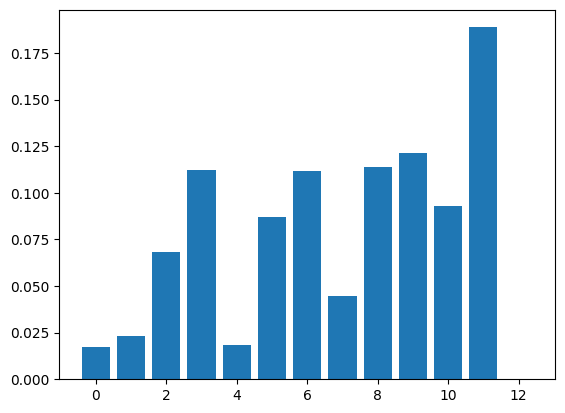

In [14]:
importance = DT_model.feature_importances_
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))

plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [15]:
predictions = DT_model.predict(X_test)

In [16]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

       cubic       0.65      0.78      0.71        46
orthorhombic       0.81      0.72      0.76        76
rhombohedral       0.38      0.33      0.35         9
  tetragonal       0.50      0.50      0.50         4

    accuracy                           0.71       135
   macro avg       0.58      0.58      0.58       135
weighted avg       0.72      0.71      0.71       135



In [17]:
print(confusion_matrix(y_test,predictions))

[[36  7  2  1]
 [18 55  3  0]
 [ 0  5  3  1]
 [ 1  1  0  2]]


## K Fold validation

In [21]:

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

kfold = KFold(n_splits = 5)

In [22]:
kfold

KFold(n_splits=5, random_state=None, shuffle=False)

In [32]:
X = data.to_numpy()
y = distortion.to_numpy()

In [41]:
print(f"Data : {X.shape} \nLabel: {y.shape}\n")
for train , val in kfold.split(X, y):
    print(f"Train: {train.shape} \nTest : {val.shape}\nTotal: {train.shape[0] + val.shape[0]}\n")
    print(f"data : {X[train].shape} \nlabel: {y[val].shape}\n")

Data : (675, 13) 
Label: (675,)

Train: (540,) 
Test : (135,)
Total: 675

data : (540, 13) 
label: (135,)

Train: (540,) 
Test : (135,)
Total: 675

data : (540, 13) 
label: (135,)

Train: (540,) 
Test : (135,)
Total: 675

data : (540, 13) 
label: (135,)

Train: (540,) 
Test : (135,)
Total: 675

data : (540, 13) 
label: (135,)

Train: (540,) 
Test : (135,)
Total: 675

data : (540, 13) 
label: (135,)



## XGBoost

In [42]:
import xgboost as xgb


In [63]:
def XGB_Model_func(x , y , norm_func = None , n_estimators = 100):
    if norm_func is None:
        norm_func = lambda x : x    # noqa: E731
    
    # Define the XGBoost model with a linear objective function
    xgb_model = xgb.XGBClassifier(
        # objective='reg:linear',  # Linear objective function
        max_depth=12,
        learning_rate=0.25,
        # n_estimators=n_estimators,
        # n_jobs=-1
        gamma = 0.1,
        objective = 'multi:softprob'

    )
    
    # Train the model on the training data
    xgb_model.fit(norm_func(x), y)
    
    return xgb_model

<class 'pandas.core.series.Series'>
RangeIndex: 675 entries, 0 to 674
Series name: Lowest distortion
Non-Null Count  Dtype 
--------------  ----- 
675 non-null    object
dtypes: object(1)
memory usage: 5.4+ KB


In [58]:
y_train.to_numpy()

array(['cubic', 'orthorhombic', 'cubic', 'cubic', 'orthorhombic',
       'orthorhombic', 'orthorhombic', 'cubic', 'orthorhombic', 'cubic',
       'cubic', 'cubic', 'orthorhombic', 'cubic', 'orthorhombic',
       'orthorhombic', 'orthorhombic', 'orthorhombic', 'orthorhombic',
       'cubic', 'orthorhombic', 'cubic', 'orthorhombic', 'orthorhombic',
       'orthorhombic', 'orthorhombic', 'cubic', 'orthorhombic',
       'tetragonal', 'orthorhombic', 'cubic', 'orthorhombic', 'cubic',
       'orthorhombic', 'cubic', 'orthorhombic', 'orthorhombic', 'cubic',
       'orthorhombic', 'orthorhombic', 'cubic', 'orthorhombic',
       'rhombohedral', 'cubic', 'cubic', 'rhombohedral', 'cubic',
       'orthorhombic', 'orthorhombic', 'orthorhombic', 'orthorhombic',
       'cubic', 'orthorhombic', 'orthorhombic', 'tetragonal', 'cubic',
       'orthorhombic', 'orthorhombic', 'orthorhombic', 'orthorhombic',
       'orthorhombic', 'orthorhombic', 'orthorhombic', 'cubic', 'cubic',
       'cubic', 'orthorhomb

In [70]:
def to_num(y_train):
    n = y_train.shape[0]
    y_train_np = y_train.to_numpy()
    y_train_num = np.zeros((n,))
    leftout = 0
    for i in range(n):
        if y_train_np[i] == 'cubic':
            y_train_num[i] = 1
        elif y_train_np[i] == 'rhombohedral':
            y_train_num[i] = 4
        elif y_train_np[i] == 'tetragonal':
            y_train_num[i] = 2
        elif y_train_np[i] == 'orthorhombic':
            y_train_num[i] = 3
        else:
            leftout+=1

    # leftout

    return y_train_num-1




In [71]:
y_train_num= to_num(y_train)

In [76]:
XGB_model=XGB_Model_func(X_train,y_train_num)
XGB_model

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.1, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.25, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=12, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [77]:
predictions = XGB_model.predict(X_test)
print(classification_report(to_num(y_test),predictions))

              precision    recall  f1-score   support

         0.0       0.77      0.87      0.82        46
         1.0       0.00      0.00      0.00         4
         2.0       0.83      0.86      0.84        76
         3.0       0.50      0.22      0.31         9

    accuracy                           0.79       135
   macro avg       0.53      0.49      0.49       135
weighted avg       0.76      0.79      0.77       135



In [79]:
from imblearn.over_sampling import SMOTE
# from sklearn.datasets import make_classification
# from sklearn.model_selection import train_test_split

# Create a sample multiclass imbalanced dataset
# X, y = make_classification(n_samples=100, n_features=20, n_informative=10, n_redundant=0, n_repeated=0, n_classes=5, n_clusters_per_class=1, weights=[0.1, 0.2, 0.3, 0.2, 0.2], random_state=42)

# Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a SMOTE object with k=5 and ratio=1
smote = SMOTE()

# Oversample the minority classes
X_res, y_res = smote.fit_resample(X_train, y_train)
print(f"X_res = {X_res.shape}")
print(f"y_res = {y_res.shape}/n")
# Print the new class distribution
# print("Original class distribution:", np.unique(y_train, return_counts=True))
# print("Oversampled class distribution:", np.unique(y_res, return_counts=True))

XGB_model_S = XGB_Model_func(X_res,to_num(y_res))

X_res = (1144, 13)
y_res = (1144,)/n


In [80]:
X_res

,v(A),v(B),r(AXII)(Å),r(AVI)(Å),r(BVI)(Å),EN(A),EN(B),l(A-O)(Å),l(B-O)(Å),ΔENR,tG,τ,μ
0,2,4,1.090000,0.960000,0.690000,1.250000,1.960000,2.411516,2.052287,-1.963536,0.842438,4.938728,0.492857
1,2,4,0.960000,0.620000,0.580000,1.550000,1.630000,2.472899,1.758039,-1.724643,0.842814,4.983174,0.414286
2,2,4,1.320000,0.960000,0.780000,1.170000,2.330000,2.611965,2.362864,-2.113929,0.882262,4.228363,0.557143
3,3,3,1.270000,0.980000,0.760000,1.140000,2.050000,2.617634,2.075849,-2.188464,0.874063,2.605707,0.542857
4,3,3,1.270000,0.980000,0.620000,1.140000,1.810000,2.617634,1.974644,-2.010321,0.934641,1.828092,0.442857
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1139,2,4,1.490000,0.990000,0.881466,2.330000,2.116600,2.659877,2.025244,-2.136620,0.899491,4.346011,0.629618
1140,2,3,1.404953,0.920416,0.617732,2.090323,1.748751,2.547403,1.964029,-1.907362,0.983024,2.093961,0.441237
1141,1,5,1.717466,1.479451,0.640000,0.921373,1.587328,3.038733,1.955277,-2.498286,1.080579,3.906030,0.457143
1142,1,4,1.695870,1.482708,0.712390,0.835355,1.631618,3.075135,1.991618,-2.635811,1.041226,3.925441,0.508850


In [81]:
XGB_model_S

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.1, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.25, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=12, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [82]:
predictions = XGB_model_S.predict(X_test)
print(classification_report(to_num(y_test),predictions))

              precision    recall  f1-score   support

         0.0       0.77      0.87      0.82        46
         1.0       0.40      0.50      0.44         4
         2.0       0.88      0.83      0.85        76
         3.0       0.33      0.22      0.27         9

    accuracy                           0.79       135
   macro avg       0.59      0.61      0.59       135
weighted avg       0.79      0.79      0.79       135



# RF with SMOTE

In [84]:
RF_model = RF_Model(X_train, y_train)
y_pred = RF_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       cubic       0.81      0.91      0.86        46
orthorhombic       0.83      0.86      0.84        76
rhombohedral       0.50      0.22      0.31         9
  tetragonal       0.00      0.00      0.00         4

    accuracy                           0.81       135
   macro avg       0.54      0.50      0.50       135
weighted avg       0.78      0.81      0.79       135



In [85]:
RF_model = RF_Model(X_res, y_res)
y_pred = RF_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       cubic       0.77      0.93      0.84        46
orthorhombic       0.89      0.82      0.85        76
rhombohedral       0.57      0.44      0.50         9
  tetragonal       0.50      0.25      0.33         4

    accuracy                           0.81       135
   macro avg       0.68      0.61      0.63       135
weighted avg       0.81      0.81      0.81       135



In [45]:
RF_model = RF_Model(X_res, y_res)
y_pred = RF_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       cubic       0.89      0.83      0.86       655
orthorhombic       0.67      0.72      0.70       312
rhombohedral       0.32      0.33      0.32        67
  tetragonal       0.32      0.59      0.41        22

    accuracy                           0.76      1056
   macro avg       0.55      0.62      0.57      1056
weighted avg       0.78      0.76      0.77      1056



In [46]:
RF_model.score(X_test, y_test)

0.7632575757575758